## What Influences a University's Reputation for Research Excellence?
#### STAT 301 Group Report 

---

<br><br>

Plan:
- [ ] FINISH PARTS BY 9PM ON SATURDAY!!!!!!
- [x] format references -> kai
- [x] copy paste cleaning, eda diagrams, methods -> gina 
- [x] relevant background information on the topic so that someone unfamiliar with it will be prepared to understand the rest of your proposal. -> kai
- [x] find 2 articles -> kai
- [x] frame your question/objectives in terms of what is already known in the literature. -> prajna
- [x] Summarize what you found, and the implications/impact of your findings. -> Prajna, sabrina 
- [x] If relevant, discuss whether your results were what you expected to find. -> sabrina 
- [x] Discuss how your model could be improved;  -> gina
- [x] Discuss future questions/research this study could lead to.  -> gina

<br><br>

## Introduction
In recent years, the assessment of higher education institutions has garnered significant attention due to the implications for students, educators, policymakers, and the academic community at large. University rankings serve as a vital tool for students seeking quality education, researchers exploring collaborative opportunities, and institutions striving for excellence in teaching and research. A university's research capability ranking in particular is of interest to both students (usually Graduate or Masters candidates) and faculty. Understanding the factors influencing this rankings is crucial for stakeholders within and external to the university to make informed decisions and enhance educational outcomes.

For a student, the university's teaching effectiveness might be the most significant factor contributing to a good rating. For faculty and policy makers within the institution, teaching effectiveness is often in a delicate balance with research capabilities for resources. Fairweather (2002) suggests that for a faculty member to participate in both teaching and research is a mutually reinforcing process that allows them to be a "complete faculty member". Gaikwad (2021) suggests that research production can be critical to feelings of job security for those primarily involved in teaching. Given that balancing the two activities requires decisions on the allotment of resources like money and time, we believe it is worthwhile to explore the relationship between a university's research capabilities and teaching effectiveness. However, there is not a conclusive perspective on this relationship in much of the existing literature (Khan, 2017).    

We believe that a university's gender diversity may also produce insights about its research capabilities. The inclusion of women in research can produce a more diverse environment of ideas and perspectives, leading to innovation and quality research. The gender gap in university research teams has shrunk, but a lack of statistical information as a current shortcoming in academia that hinders the effective study of the relationship between gender and research quality (Restrepo, 2021).  

While previous research has shed light on the multifaceted nature of university rankings, there remains a gap in understanding the relationship between teaching effectiveness, research capabilities, and gender diversity. This study aims to address this gap by investigating how these factors influence university rankings, with a focus on the World University Rankings 2023 dataset. By examining the interplay between teaching effectiveness, research capabilities, and gender diversity, we seek to provide insights that can inform institutional policies and practices, enhance educational outcomes, and promote diversity and inclusion in academia.

<br>

#### Research Question 
In this study, we aim to investigate how specific variables affect the research score of universities, as indicated in the World University Rankings 2023 dataset. Our primary research question is:

**"How does a university's research capabilities change based on its rank, teaching effectiveness, and female-to-male student ratio?"**

<br>

#### Dataset Description

To address these questions, we utilize the [World University Rankings 2023 dataset](https://www.kaggle.com/datasets/alitaqi000/world-university-rankings-2023), sourced from Kaggle. This dataset is a comprehensive collection of data from 1799 universities across 104 countries and regions. Compiled by Times Higher Education, the dataset incorporates survey responses from 40,000 scholars worldwide and analyzes 121 million citations from over 15.5 million research publications. With over 2,500 institutions contributing data, the dataset comprises over 680,000 data points, providing a rich source for exploration.

In all, we have 13 different variables and 2341 observations (including NAs). The university's research capabilities will be operationalized with Research Score, and teaching effectiveness with Teaching Score. These variables offer insights into various aspects of university performance and enable us to examine the relationships between teaching, research, and gender diversity. The variables are:
<br><br>

| | Variable | Variable Type | Description |
|---| -------- | ------- | --- |
|1| University rank  | chr  |Rank of specific university all over the world|
|2| University name | chr    |Specific name of University|
|3| Location | chr |Physical place where university exists|
|4| No. of students | chr |Present number of students enrolled in university as of 2023|
|5| No. of students per staff |dbl |Number of students under one Professor|
|6| International students |chr  |Total number of International Students|
|7| Female : male ratio |chr  |A ratio of female to male students respectively|
|8| Overall score | chr | The combined weighted scores of those given below. Out of 100|
|9| Teaching score | chr |The percieved prestige of the institution based on the Academic Reputation Survey. Out of 100.|
|10| Research score | chr |Reputation for research excellence amongst peers based on the Academic Reputation Survey. Out of 100|
|11| Citations score | chr |The number of citations received by a journal in one year to documents published in the three previous years, divided by the number of documents indexed in Scopus published in those same three years. Out of 100.|
|12| Industry income score | chr |How much money a university receives from the working industry in exchange for its academic expertise. Out of 100|
|13| International outlook score | chr |The ability of a university to attract undergraduates, postgraduates and faculty from all over the globe.|

<br><br>

---
## Methods and Results

#### Exploratory Data Analysis (EDA)
- [x] Demonstrate that the dataset can be read from the web into R.
- [ ] Clean and wrangle your data into a tidy format.
- [ ] Plot the relevant raw data, tailoring your plot in a way that addresses your question.
    - [ ] CORR PLOT FROM SABRINA
    - [ ] GINA'S 3 EDA GRAPHS 
    - [ ] make sure to explore the association of the explanatory variables with the response.
    - [ ] your Exploratory Data Analysis (EDA) must be comprehensive with high quality plots.
- [ ] Any summary tables that is relevant to your analysis.
- [ ] Be sure to not print output that takes up a lot of screen space.

<br>

#### Methods: Plan
- [ ] Describe in written English the methods you used to perform your analysis from beginning to end that narrates the code that does the analysis.
- [ ] If included, describe the “Feature Selection” process, how and why you choose the covariates of your final model.
- [ ] Make sure to interpret/explain the results you obtain. It’s not enough to just say “I fitted a linear model with these covariates, and my R-square is 0.87”.
    - [ ] if inference is the aim of your project, detailed interpretation of your fitted model is required, as well as a discussion of relevant quantities (e.g., are the coefficients significant? how is the model fitting the data)?
    - [ ] a careful model assessment must be conducted.
    - [ ] if prediction is the aim of the project, describe the test data used or how it was created.
- [ ] Ensure your tables and/or figures are labeled with a figure/table number.

<br><br>

In [41]:
install.packages("readr")
install.packages("ggplot2")
install.packages("leaps")
install.packages("olsrr")
library(readr)
library(dplyr)
library(ggplot2)
library(leaps)
library(olsrr)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done


Attaching package: ‘olsrr’


The following object is masked from ‘package:datasets’:

    rivers




### First, we read the dataset from the web into R

In [42]:
# set the desired size for plots
options(repr.plot.width = 12, repr.plot.height = 20) 

# adjust the number of significant digits to display for double type values
options(digits = 15)  

# Read in the data from the web and display the first few rows
data <- read_csv("https://raw.githubusercontent.com/gna7/stat301report/main/world_university_rankings_2023.csv",show_col_types = FALSE)
head(data)

University Rank,Name of University,Location,No of student,No of student per staff,International Student,Female:Male Ratio,OverAll Score,Teaching Score,Research Score,Citations Score,Industry Income Score,International Outlook Score
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Reporter,Polytechnic University of Tirana,Albania,8591,16.2,2,n/a,n/a,n/a,n/a,n/a,n/a,n/a
Reporter,University of Constantine 3,Algeria,14736,16.2,2,73 : 27,n/a,n/a,n/a,n/a,n/a,n/a
Reporter,Hassiba Benbouali University of Chlef,Algeria,30121,22.3,1,71 : 29,n/a,n/a,n/a,n/a,n/a,n/a
Reporter,École Polytechnique d’Architecture et d’Urbanisme,Algeria,1371,10.1,0,69 : 31,n/a,n/a,n/a,n/a,n/a,n/a
1501,University of Abou Bekr Belkaïd Tlemcen,Algeria,40203,20.2,1,68 : 32,10.4–18.3,22.7,8.8,10.6,37.0,34.9
1501,Blida 1 University,Algeria,30076,20.4,1,68 : 32,10.4–18.3,18.3,8.3,18.2,37.1,35.9


### Cleaning and Wrangling data into a Tidy format:

By looking at the last rows of the data, we see many NA and n/a values. To clean the data up, we use na.omit() to remove these values.

In [43]:
tail(data)
data[data == "n/a"]  <- NA
tidy_data <- na.omit(data)

University Rank,Name of University,Location,No of student,No of student per staff,International Student,Female:Male Ratio,OverAll Score,Teaching Score,Research Score,Citations Score,Industry Income Score,International Outlook Score
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
-,University of the Western Cape,NA,NA,NA,NA,n/a,34.0–39.2,20.4,23.7,61.6,36.9,55.8
-,University of the West of Scotland,NA,NA,NA,NA,n/a,34.0–39.2,24.1,15.5,61.5,37.9,76.8
-,University of Windsor,NA,NA,NA,NA,n/a,34.0–39.2,35.1,29.4,34.5,44.2,88.7
-,University of Wolverhampton,NA,NA,NA,NA,n/a,34.0–39.2,18.2,14.3,68.8,37.3,72.0
-,University of Wuppertal,NA,NA,NA,NA,n/a,34.0–39.2,26.4,26.7,52.8,52.1,47.6
-,Xi’an Jiaotong-Liverpool University,NA,NA,NA,NA,n/a,34.0–39.2,17.8,14.8,68.2,38.2,72.4


Now when we view the last rows of our data, all NA observations have been removed:

In [44]:
tail(tidy_data)

University Rank,Name of University,Location,No of student,No of student per staff,International Student,Female:Male Ratio,OverAll Score,Teaching Score,Research Score,Citations Score,Industry Income Score,International Outlook Score
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
401–500,Duy Tan University,Vietnam,21670,21.9,0,62 : 38,42.1–44.9,14.4,12.6,100.0,37.7,48.6
1501,Hue University,Vietnam,47590,22.0,1,57 : 43,10.4–18.3,13.7,8.1,14.5,37.4,47.2
1501,Vietnam National University (Ho Chi Minh City),Vietnam,75704,21.7,1,46 : 54,10.4–18.3,15.1,10.1,20.7,41.5,35.6
1501,Hanoi University of Science and Technology,Vietnam,32758,31.1,0,22 : 78,10.4–18.3,14.9,12.3,20.2,43.5,39.4
501–600,University of Zambia,Zambia,16903,21.2,1,35 : 65,39.3–42.0,15.7,9.2,96.8,38.4,49.9
1001–1200,University of Zimbabwe,Zimbabwe,20598,23.9,0,51 : 49,24.4–29.7,14.8,23.3,35.6,43.1,50.0


To simplify data handling for future visualizations etc., we will replace the spaces in the variable names with periods. We use make.names() to do this. 

In [45]:
names(tidy_data) <- make.names(names(tidy_data))

head(tidy_data)

University.Rank,Name.of.University,Location,No.of.student,No.of.student.per.staff,International.Student,Female.Male.Ratio,OverAll.Score,Teaching.Score,Research.Score,Citations.Score,Industry.Income.Score,International.Outlook.Score
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1501,University of Abou Bekr Belkaïd Tlemcen,Algeria,40203,20.2,1,68 : 32,10.4–18.3,22.7,8.8,10.6,37.0,34.9
1501,Blida 1 University,Algeria,30076,20.4,1,68 : 32,10.4–18.3,18.3,8.3,18.2,37.1,35.9
1201–1500,Université 8 Mai 1945 Guelma,Algeria,17530,20.1,1,67 : 33,18.4–24.3,16.2,8.6,41.3,37.0,36.5
1201–1500,Oran 1 University,Algeria,25775,19.2,1,66 : 34,18.4–24.3,30.4,8.3,22.2,37.6,39.5
1501,Université Mouloud Mammeri de Tizi-Ouzou,Algeria,41107,18.1,0,66 : 34,10.4–18.3,21.9,7.5,6.3,36.9,44.9
401–500,Ferhat Abbas Sétif University 1,Algeria,34637,22.7,1,63 : 37,42.1–44.9,18.2,19.8,94.7,36.9,40.0


We use duplicated() to check if there's any duplicate observations. With a FALSE output, we know each observation is unique. 

In [46]:
duplicated_rows <- duplicated(tidy_data)
summary(duplicated_rows)

   Mode   FALSE 
logical    1487 

In order to simplify the process of handling and visualizing data, we will convert the Female to Male Ratio to a single numerical value. Here, we will divide the female count by the total count. Ex. For a 48 : 52 Female to Male Ratio, the result would be 48/(48 + 52) = 0.48 

In [47]:
tidy_data$Female.Male.Ratio <- sapply(strsplit(tidy_data$Female.Male.Ratio, ":"), function(x) as.numeric(x[1])/(as.numeric(x[2]) + as.numeric(x[1])))

head(tidy_data)

University.Rank,Name.of.University,Location,No.of.student,No.of.student.per.staff,International.Student,Female.Male.Ratio,OverAll.Score,Teaching.Score,Research.Score,Citations.Score,Industry.Income.Score,International.Outlook.Score
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1501,University of Abou Bekr Belkaïd Tlemcen,Algeria,40203,20.2,1,0.68,10.4–18.3,22.7,8.8,10.6,37.0,34.9
1501,Blida 1 University,Algeria,30076,20.4,1,0.68,10.4–18.3,18.3,8.3,18.2,37.1,35.9
1201–1500,Université 8 Mai 1945 Guelma,Algeria,17530,20.1,1,0.67,18.4–24.3,16.2,8.6,41.3,37.0,36.5
1201–1500,Oran 1 University,Algeria,25775,19.2,1,0.66,18.4–24.3,30.4,8.3,22.2,37.6,39.5
1501,Université Mouloud Mammeri de Tizi-Ouzou,Algeria,41107,18.1,0,0.66,10.4–18.3,21.9,7.5,6.3,36.9,44.9
401–500,Ferhat Abbas Sétif University 1,Algeria,34637,22.7,1,0.63,42.1–44.9,18.2,19.8,94.7,36.9,40.0


In [48]:
tidy_data <- tidy_data |> select(No.of.student, Industry.Income.Score, University.Rank, Female.Male.Ratio,International.Outlook.Score,No.of.student.per.staff,Teaching.Score,Research.Score,Citations.Score)
tail(tidy_data)

No.of.student,Industry.Income.Score,University.Rank,Female.Male.Ratio,International.Outlook.Score,No.of.student.per.staff,Teaching.Score,Research.Score,Citations.Score
<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>
21670,37.7,401–500,0.62,48.6,21.9,14.4,12.6,100.0
47590,37.4,1501,0.57,47.2,22.0,13.7,8.1,14.5
75704,41.5,1501,0.46,35.6,21.7,15.1,10.1,20.7
32758,43.5,1501,0.22,39.4,31.1,14.9,12.3,20.2
16903,38.4,501–600,0.35,49.9,21.2,15.7,9.2,96.8
20598,43.1,1001–1200,0.51,50.0,23.9,14.8,23.3,35.6


Here we see that the University.Rank values in the tail of tidy_data are not exact ranks. They are all grouped in categories. Using unique(), we can get an overview of all possible values of University.Rank. Unique ranks range from 1 to 198. Ranks past 198 are grouped into one of 11 ranges.

The categories are quite large. For example, the rank 1201-1500 is very broad. Therefore, including this in our exploration would not bring more insight.

In [49]:
unique_values <- unique(tidy_data$University.Rank)
print(unique_values)

  [1] "1501"      "1201–1500" "401–500"   "251–300"   "351–400"   "601–800"  
  [7] "301–350"   "1001–1200" "34"        "54"        "201–250"   "44"       
 [13] "501–600"   "62"        "175"       "131"       "124"       "168"      
 [19] "194"       "107"       "801–1000"  "170"       "18"        "40"       
 [25] "95"        "51"        "52"        "114"       "117"       "166"      
 [31] "110"       "90"        "47"        "93"        "73"        "91"       
 [37] "86"        "128"       "139"       "89"        "113"       "119"      
 [43] "148"       "196"       "156"       "99"        "189"       "183"      
 [49] "68"        "66"        "145"       "60"        "121"       "59"       
 [55] "70"        "126"       "36"        "182"       "186"       "49"       
 [61] "155"       "94"        "101"       "82"        "11"        "41"       
 [67] "35"        "29"        "22"        "108"       "192"       "198"      
 [73] "37"        "130"       "163"       "137"       "122"     

To remove these broad ranges, we use as.numeric() to convert the University Rank entries to numeric. Ranges will become NA values. We then remove these NA values using na.omit(). 

In [50]:
tidy_data$University.Rank <- as.numeric(tidy_data$University.Rank)
tidy_data <- na.omit(tidy_data)
tail(tidy_data)

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


No.of.student,Industry.Income.Score,University.Rank,Female.Male.Ratio,International.Outlook.Score,No.of.student.per.staff,Teaching.Score,Research.Score,Citations.Score
<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>
2237,89.8,6,0.37,83.6,6.2,90.9,97.0,97.3
28826,64.9,38,0.33,81.2,24.7,60.2,75.9,91.4
24372,36.9,1501,0.61,48.1,11.7,15.9,7.8,8.9
47590,37.4,1501,0.57,47.2,22.0,13.7,8.1,14.5
75704,41.5,1501,0.46,35.6,21.7,15.1,10.1,20.7
32758,43.5,1501,0.22,39.4,31.1,14.9,12.3,20.2


## Creating Visualizations:
Here, we plot University Ranking vs. the Female to Male ratio. In the plot below, there is no evidence of a relationship. Gender ratios do not appear to affect ranking.

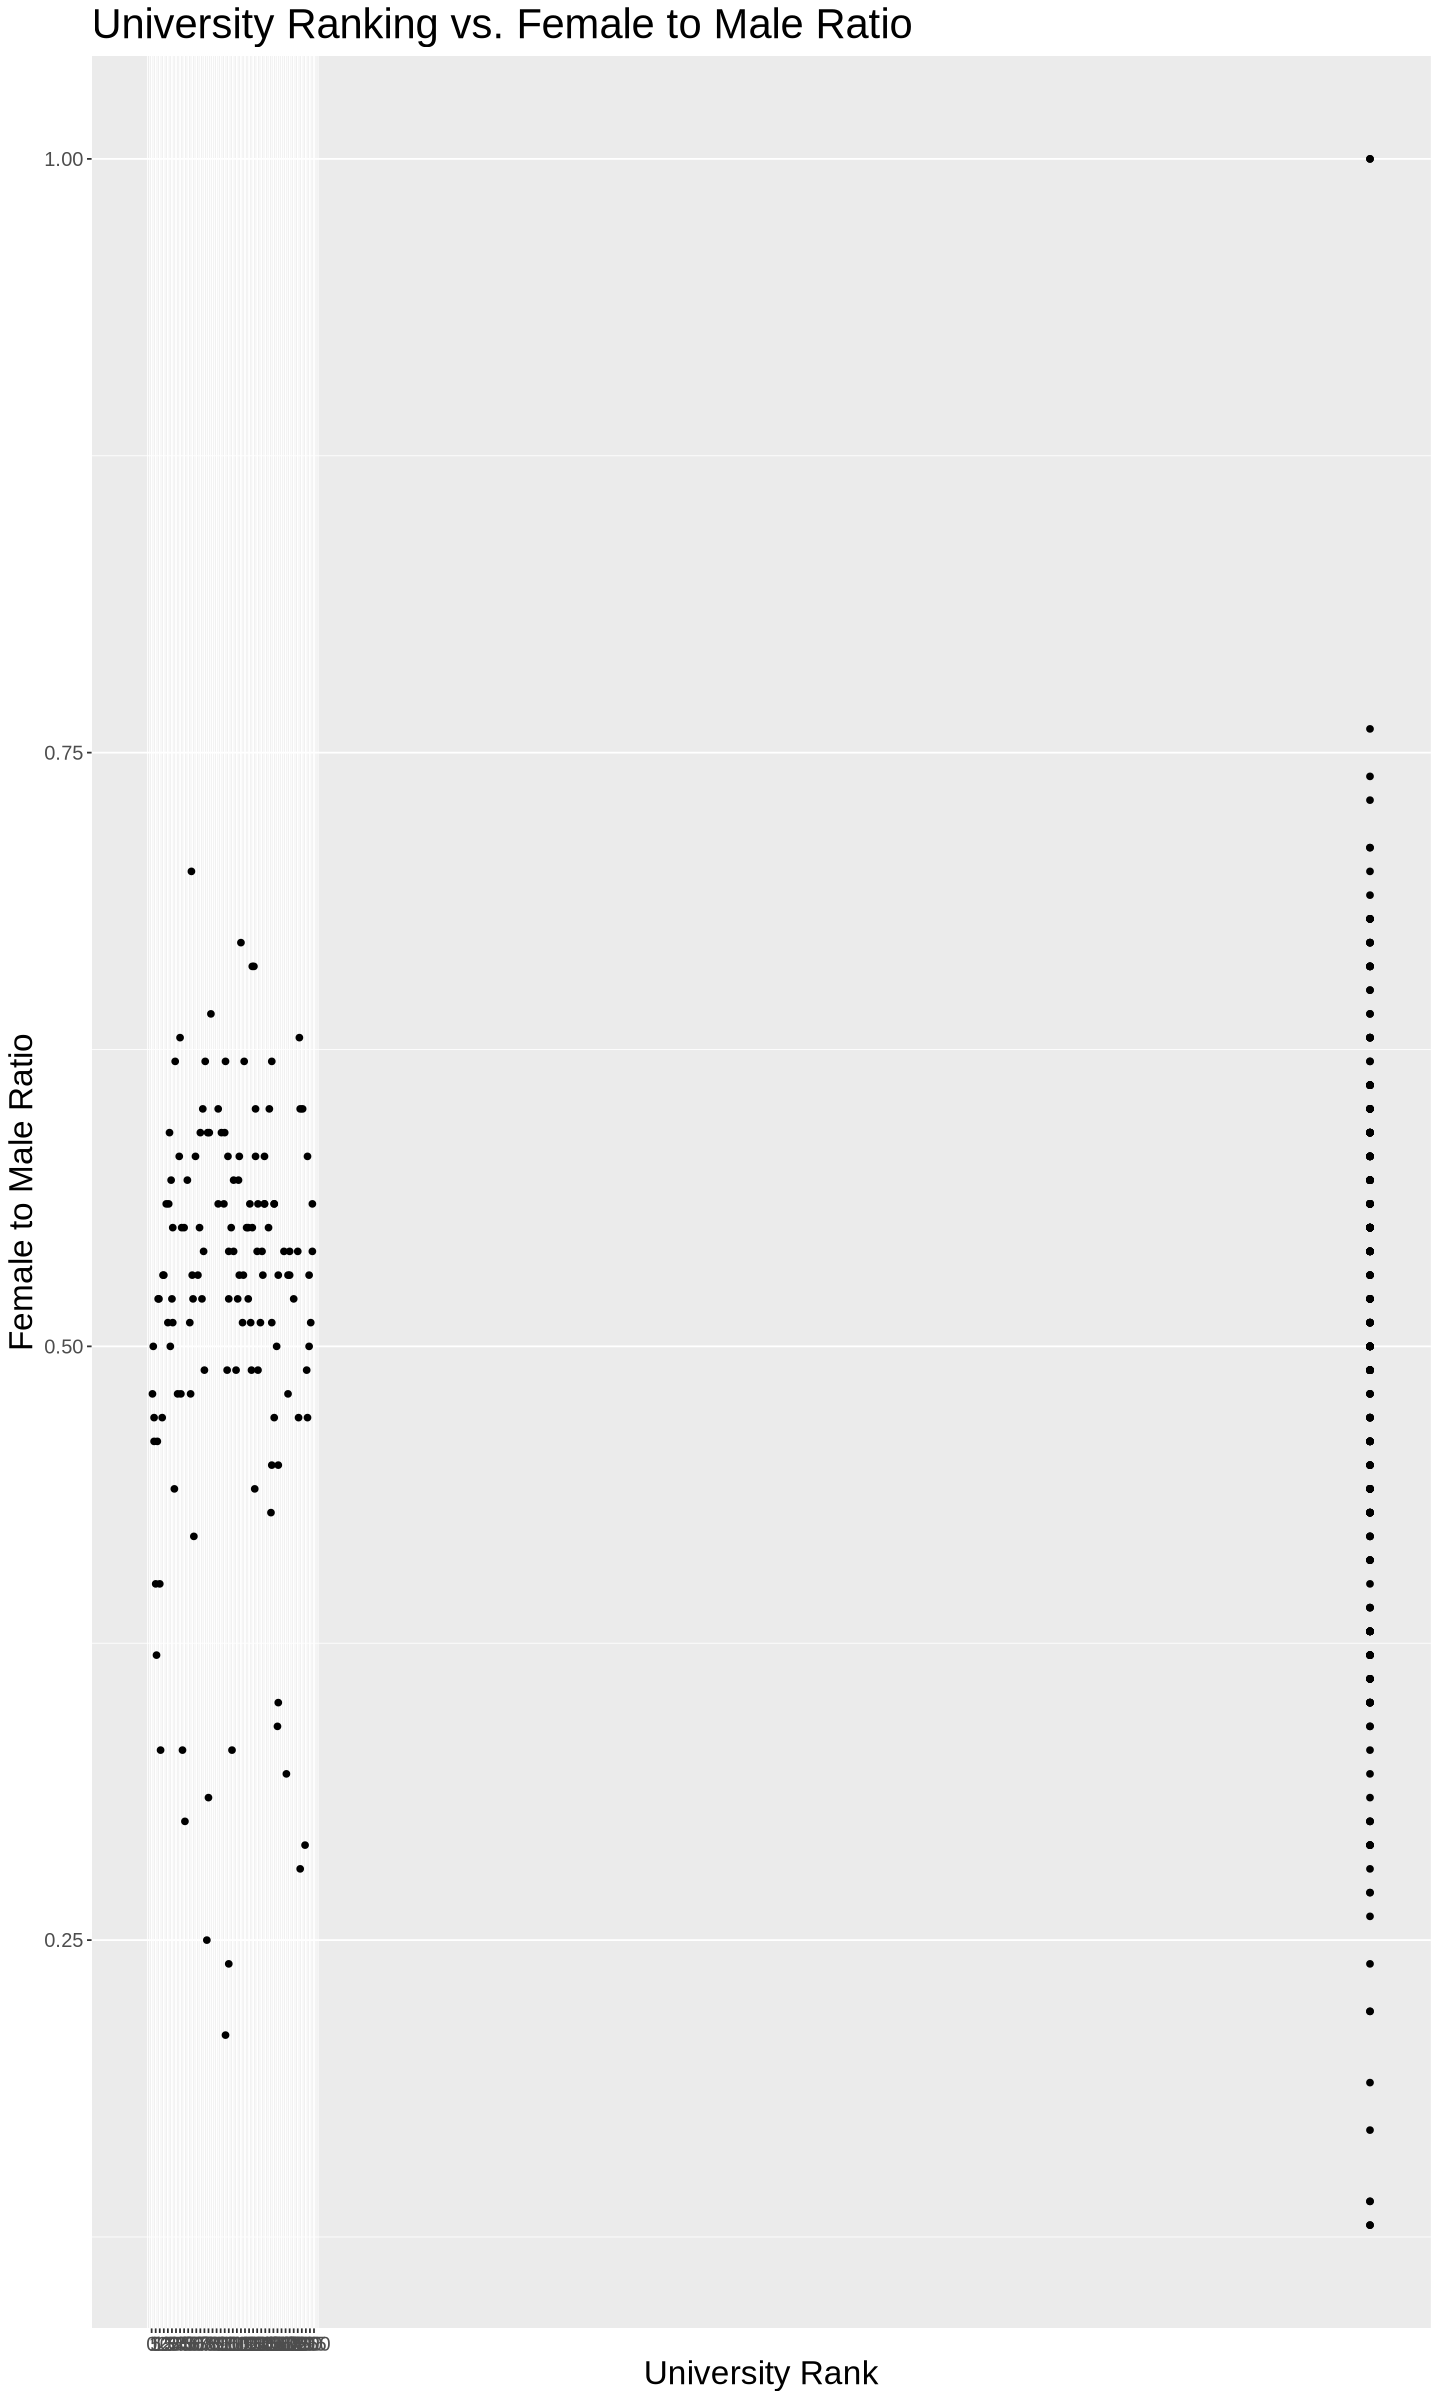

In [51]:
ggplot(tidy_data, aes(x=University.Rank, y=Female.Male.Ratio)) +
       geom_point()+ scale_x_continuous(breaks = seq(0, 200, by = 5)) + labs(x = "University Rank", y = "Female to Male Ratio", title = "University Ranking vs. Female to Male Ratio") +
       theme(axis.text = element_text(size = 12),  
             axis.title = element_text(size = 20),  
             plot.title = element_text(size = 25))  

options(repr.plot.width = 18, repr.plot.height = 6)

We then plot Research and Teaching Scores vs. University Ranking. In the visualization below, research scores have been colored blue and teaching scores are red. There is a strong pattern of both scores with ranking. This is to be expected, as ranking is based on the overall score (of which Research and Teaching scores are factors in). 

The relationships do not appear to be strictly linear, as a slight curve is visible. 

In [52]:
ggplot(tidy_data, aes(x = Teaching.Score, y = University.Rank, color = "Teaching.Score")) +
  geom_point() +
  geom_point(aes(x = Research.Score, color = "Research.Score")) +
  scale_x_continuous(limits = c(1, 100), breaks = seq(0, 100, by = 10)) +
  labs(x = "Score on a scale of 0-100", y = "University Ranking", color = "Variables", title = "Research and Teaching Scores vs. University Ranking") +
  scale_color_manual(values = c("blue", "red")) +
  theme(axis.text = element_text(size = 12),  
        axis.title = element_text(size = 20),  
        plot.title = element_text(size = 25),
        legend.text = element_text(size = 15),
        legend.title = element_text(size = 15))  

options(repr.plot.width = 18, repr.plot.height = 6)

ERROR while rich displaying an object: Error in `scale_x_continuous()`:
! Discrete values supplied to continuous scale.
ℹ Example values: "22.7", "18.3", "21.9", "20.0", and "20.9"

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)

Below, we plot the research and teaching scores vs. the female to male ratio. The plot appears scattered for both scores. Although there seems to be a higher teaching and research score for a higher female to male ratio, the magnitude of difference is not very convincing.

In [ ]:
ggplot(tidy_data, aes(x = Teaching.Score, y = Female.Male.Ratio, color = "Teaching.Score")) +
  geom_point() +
  geom_point(aes(x = Research.Score, color = "Research.Score")) +
  scale_x_continuous(limits = c(1, 100), breaks = seq(0, 100, by = 10)) +
  labs(x = "Score on a scale of 0-100", y = "Female.Male.Ratio", color = "Variables", title = "Research and Teaching Score vs. Female to Male Ratio") +
  scale_color_manual(values = c("blue", "red")) +
  theme(axis.text = element_text(size = 12),  
        axis.title = element_text(size = 20),  
        plot.title = element_text(size = 25),
        legend.text = element_text(size = 15),
        legend.title = element_text(size = 15))  

options(repr.plot.width = 18, repr.plot.height = 6)

Lastly, we plot the research score vs. the teaching scores. These scores were seperately surveyed. There is a strong positive linear relationship between the two scores. This result is quite intuitive.

In [ ]:
ggplot(tidy_data, aes(x=Research.Score, y=Teaching.Score)) +
       geom_point()+ scale_x_continuous(breaks = seq(0, 100, by = 5)) +
scale_y_continuous(breaks = seq(0, 100, by = 5)) +
labs(x = "Research Score from 0-100", y = "Teaching Score from 0-100", title = "Research Score vs. Teaching Score") +
       theme(axis.text = element_text(size = 12),  
             axis.title = element_text(size = 20),  
             plot.title = element_text(size = 25))  

options(repr.plot.width = 18, repr.plot.height = 6)

<<br><br>

---
## Discussion
- [x] In this section, you’ll interpret the results you obtained in the previous section with respect to the main question/goal of your project.
- [x] Summarize what you found, and the implications/impact of your findings.
- [x] If relevant, discuss whether your results were what you expected to find.
- [ ] Discuss how your model could be improved;
- [x] Discuss future questions/research this study could lead to.

# Implementation of a proposed model

In [ ]:
tidy_data <- as.data.frame(lapply(tidy_data, as.numeric))

# Using regsubsets(), we conduct an exhaustive search for variable selection by considering all possible subsets of predictors:
subsets = regsubsets(Research.Score~., data = tidy_data, method = "exhaustive")
s = summary(subsets)
predictors <- ifelse(s$which, "Yes", "x")

table <- data.frame("Adj R Squared" = s$adjr2,
                    "Cp Value" = s$cp, 
                    predictors)
table

The most optimal model for this research question would be model 5 due to the highly adjusted R^2 (0.917) and Cp value (10.720769). This model was chosen as the optimal model for this question since the Cp stays stable (e.g. does not get closer to 9) with added predictor variables and the R^2 does not vary either. Relative to our research question, we can say that the variables of **Rank, International Outlook Score, Number of Students per Staff, Teaching Score, and Citation Score are all influential in a university's Research Score based on the above findings.** We found that the recorded Research Scores had significant linear correlations with the variables of University Rank, International Outlook Score, No. of Students Per Staff, Teaching Score, and Citation Score. These findings align with our expected results and were not surprising.

These findings can influence how universities around the globe can improve their research excellence, that is, which factors universities can focus on improving in order to enhance their research excellence. For instance, since Teaching Scores were correlated with Research Scores, improving one's Teaching Scores can result in research improvements as well. This can impact universities in various ways, especially for those that are primarily research-based schools. Improving Research Scores can yield more academic findings from these universities and provide more opportunities for students to conduct and publish their own meaningful research.

Future questions that can be discussed based on the findings from this project are:

- Can these results be replicated in data taken only from women's universities?
- Does the type of research done at each university influence thier research scores?

A potential concern is that this model is overfitted as a result of using an exhaustive search of regsubsets(). To limit overfitting, alternate modelling techniques like forward and backward selection may be an option, where a predictor is added or removed based on strict criterion. Using cross-validation could also lower the risk of overfitting and introduce a better predictive ability. Utilizing different criteria, such as AIC or BIC could improve the model too, making sure that unnecessary predictors are excluded. 

<br><br>

---
## References

Fairweather, J. S. (2002). The mythologies of faculty productivity: Implications for Institutional Policy and decision making. The Journal of Higher Education, 73(1), 26–48. https://doi.org/10.1353/jhe.2002.0006  

Gaikwad, P. (2021). Balancing Research Productivity and Teaching by Faculty in Higher Education: A Case Study in the Philippines. Journal of Higher Education Theory and Practice, 21(7). https://doi.org/10.33423/jhetp.v21i7.4495

Khan, M. A. (2017). Achieving an appropriate balance between teaching and research in institutions of Higher Education: An exploratory study. International Journal of Information and Education Technology, 7(5), 341–349. https://doi.org/10.18178/ijiet.2017.7.5.892 

Restrepo, N., Unceta, A., & Barandiaran, X. (2021). Gender diversity in research and innovation projects: The proportion of women in the context of Higher Education. Sustainability, 13(9), 5111. https://doi.org/10.3390/su13095111 

Taqi, S. A. (2023). World University Rankings 2023 [Data set]. Kaggle. https://doi.org/10.34740/KAGGLE/DSV/6394958